In [6]:
import numpy, scipy
from scipy.constants import k as k_B

NUM_SPIN  = 100
NUM_STEP  = 20000
NUM_FIELD = 11

def get_ene_diff(config, i : int, ising_h : float, ising_j : float):
    """Return the energy difference of flipping spin i.
    Args:
        config (numpy.ndarray): The current configuration.
        i (int): The index of the spin to flip.
        ising_h (float): The external field.
        ising_j (float): The coupling constant.

    Returns:
        ene_diff (float): The energy difference of flipping spin i.
    """

    ene_diff  = 2.0 * config[i % 100] * ising_h
    ene_diff += 2.0 * config[i % 100] * config[(i-1) % 100] * ising_j
    ene_diff += 2.0 * config[i % 100] * config[(i+1) % 100] * ising_j
    return ene_diff

def sweep(config: numpy.ndarray, ising_h: float, ising_j: float, beta: float, max_step: int):
    """Perform a Monte Carlo sweep.
    Args:
        config (numpy.ndarray): The current configuration.
        ising_h (float): The external field.
        ising_j (float): The coupling constant.
        beta (float): The inverse temperature.
        nsteps (int): The number of Monte Carlo steps to perform.

    Returns:
        config (numpy.ndarray): The new configuration.
    """

    m_list = []

    istep = 0
    
    while istep < max_step:
        for i in range(NUM_SPIN):
            ene_diff = get_ene_diff(config, i, ising_h, ising_j)
            if ene_diff <= 0.0:
                config[i] *= -1
            elif numpy.random.rand() < numpy.exp(-beta * ene_diff):
                config[i] *= -1
        
        if istep / max_step * 100 % 10 == 0:
            print(f"MC progress: {(istep / max_step * 100): 8.4f}%")
        m_list.append(numpy.sum(config))
        istep += 1
        
    return m_list

config0 = numpy.ones(NUM_SPIN, dtype = int)
config0[numpy.random.choice(NUM_SPIN, NUM_SPIN//2, replace = False)] = -1

for temp in [0.5, 1.0, 2.0]:
    mm = []

    if False:
        continue

    for h in numpy.linspace(-2.0, 2.0, NUM_FIELD):
        m_list = sweep(config0.copy(), h, 1.0, 1.0/temp, NUM_STEP)
        mm.append(m_list)
    mm = numpy.asarray(mm)

    numpy.savetxt(f"ising_1d_h_{temp:6.4f}.csv", mm, fmt = "%12.8f", delimiter = ", ")

MC progress:   0.0000%
MC progress:  10.0000%
MC progress:  20.0000%
MC progress:  30.0000%
MC progress:  40.0000%
MC progress:  50.0000%
MC progress:  60.0000%
MC progress:  70.0000%
MC progress:  80.0000%
MC progress:  90.0000%
MC progress:   0.0000%
MC progress:  10.0000%
MC progress:  20.0000%


KeyboardInterrupt: 

(-0.1, 1.05)

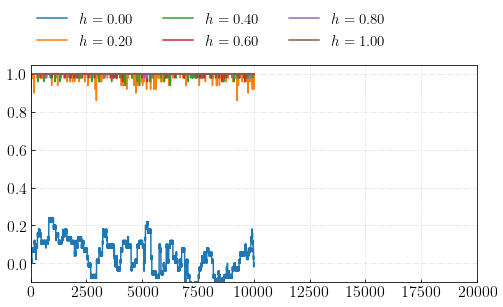

In [ ]:
import numpy, os, sys
from pyscf.lib import chkfile

sys.path.append("./src/")

import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

params = {
        "text.usetex":     True,
        "font.family":     "serif",
        "font.size":       20,
        "axes.titlesize":  30,
        "axes.labelsize":  24,
        "axes.grid":       True,
        "grid.color":      "#b0b0b0",  # grid color
        "grid.linestyle":  "-.",          # solid
        "grid.linewidth":  0.8,        # in points
        "grid.alpha":      0.3,        # transparency, between 0.0 and 1.0
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "figure.subplot.wspace":0.0,
        "figure.subplot.hspace":0.0,
        "axes.spines.right":True,
        "axes.spines.top":True,
        "xtick.direction":'in',
        "ytick.direction":'in'
}

mpl.rcParams.update(params)

def plot_steps(data_path, ax, plot_args = {}):
    data = numpy.loadtxt(data_path, delimiter = ", ")
    step = numpy.arange(data.shape[1])
    h    = numpy.linspace(-2.0, 2.0, data.shape[0])

    for i, ih in enumerate([50, 55, 60, 65, 70, 75]):
        label = r"$h = {:.2f}$".format(h[ih])
        ax.plot(step, data[ih] / NUM_SPIN, label = label, **plot_args)

    ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
              edgecolor='silver', frameon=False, fontsize=15, ncol=3)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plot_steps("ising_1d_h_0.5000.csv", ax)
ax.set_xlim(0, NUM_STEP)
ax.set_ylim(-0.1, 1.05)